In [1]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [2]:
df = pandas.read_csv("train.csv")

In [3]:
df.shape

(8693, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df['TotalBilled'] = df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  TotalBilled   7785 non-null   float64
dtypes: bool(1), float64(7), object(7)
memory usage: 959.4+ KB


In [8]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalBilled
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,7785.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1484.601541
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2845.288241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,736.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1486.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


In [9]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalBilled
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0


In [10]:
df[["Group", "ID"]] = df["PassengerId"].str.split("_", expand=True)

In [11]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalBilled,Group,ID
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,9280,01


In [12]:
df[["Deck", "Num", "Side"]] = df["Cabin"].str.split("/", expand=True)

In [13]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalBilled,Group,ID,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0004,01,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,9276,01,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,9278,01,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,9279,01,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,9280,01,E,608,S


In [14]:
df[["FirstName", "LastName"]] = df["Name"].str.split(" ", expand=True)

In [15]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,TotalBilled,Group,ID,Deck,Num,Side,FirstName,LastName
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,0.0,0001,01,B,0,P,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,736.0,0002,01,F,0,S,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,10383.0,0003,01,A,0,S,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,5176.0,0003,02,A,0,S,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,1091.0,0004,01,F,1,S,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,Gravior Noxnuther,False,8536.0,9276,01,A,98,P,Gravior,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,Kurta Mondalley,False,0.0,9278,01,G,1499,S,Kurta,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,Fayey Connon,True,1873.0,9279,01,G,1500,S,Fayey,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,Celeon Hontichre,False,4637.0,9280,01,E,608,S,Celeon,Hontichre


In [124]:
dft = pandas.read_csv("test.csv")

In [125]:
dft

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [126]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [19]:
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df['TotalCount'] = df[features].gt(0).sum(axis=1)

In [20]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,TotalBilled,Group,ID,Deck,Num,Side,FirstName,LastName,TotalCount
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,0.0,0001,01,B,0,P,Maham,Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,736.0,0002,01,F,0,S,Juanna,Vines,5
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,10383.0,0003,01,A,0,S,Altark,Susent,4
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,5176.0,0003,02,A,0,S,Solam,Susent,4
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,1091.0,0004,01,F,1,S,Willy,Santantines,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,False,8536.0,9276,01,A,98,P,Gravior,Noxnuther,3
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,False,0.0,9278,01,G,1499,S,Kurta,Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,True,1873.0,9279,01,G,1500,S,Fayey,Connon,2
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,False,4637.0,9280,01,E,608,S,Celeon,Hontichre,3


In [21]:
df['ID_max'] = df.groupby(['Group'])['ID'].transform(max)

In [22]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,TotalBilled,Group,ID,Deck,Num,Side,FirstName,LastName,TotalCount,ID_max
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,0001,01,B,0,P,Maham,Ofracculy,0,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,736.0,0002,01,F,0,S,Juanna,Vines,5,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,10383.0,0003,01,A,0,S,Altark,Susent,4,02
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,5176.0,0003,02,A,0,S,Solam,Susent,4,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1091.0,0004,01,F,1,S,Willy,Santantines,5,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,8536.0,9276,01,A,98,P,Gravior,Noxnuther,3,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,9278,01,G,1499,S,Kurta,Mondalley,0,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,1873.0,9279,01,G,1500,S,Fayey,Connon,2,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,4637.0,9280,01,E,608,S,Celeon,Hontichre,3,02


In [23]:
df['Age_bins'] = pandas.cut(x=df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

In [24]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Group,ID,Deck,Num,Side,FirstName,LastName,TotalCount,ID_max,Age_bins
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0001,01,B,0,P,Maham,Ofracculy,0,01,"(30, 40]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0002,01,F,0,S,Juanna,Vines,5,01,"(20, 30]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0003,01,A,0,S,Altark,Susent,4,02,"(50, 60]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0003,02,A,0,S,Solam,Susent,4,02,"(30, 40]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,0004,01,F,1,S,Willy,Santantines,5,01,"(10, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,9276,01,A,98,P,Gravior,Noxnuther,3,01,"(40, 50]"
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,9278,01,G,1499,S,Kurta,Mondalley,0,01,"(10, 20]"
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,9279,01,G,1500,S,Fayey,Connon,2,01,"(20, 30]"
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,9280,01,E,608,S,Celeon,Hontichre,3,02,"(30, 40]"


In [25]:
df['Age_label'] = pandas.cut(x=df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[1, 2, 3,4,5,6,7,8])

In [26]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ID,Deck,Num,Side,FirstName,LastName,TotalCount,ID_max,Age_bins,Age_label
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,01,B,0,P,Maham,Ofracculy,0,01,"(30, 40]",4
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,01,F,0,S,Juanna,Vines,5,01,"(20, 30]",3
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,01,A,0,S,Altark,Susent,4,02,"(50, 60]",6
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,02,A,0,S,Solam,Susent,4,02,"(30, 40]",4
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,01,F,1,S,Willy,Santantines,5,01,"(10, 20]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,01,A,98,P,Gravior,Noxnuther,3,01,"(40, 50]",5
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,01,G,1499,S,Kurta,Mondalley,0,01,"(10, 20]",2
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,01,G,1500,S,Fayey,Connon,2,01,"(20, 30]",3
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,01,E,608,S,Celeon,Hontichre,3,02,"(30, 40]",4


In [27]:
df.Group.unique()

array(['0001', '0002', '0003', ..., '9278', '9279', '9280'], dtype=object)

In [28]:
df.ID.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)

In [29]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [30]:
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [31]:
df.Deck.unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [32]:
df.Num.unique()

array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object)

In [33]:
df.Side.unique()

array(['P', 'S', nan], dtype=object)

In [34]:
df.FirstName.unique()

array(['Maham', 'Juanna', 'Altark', ..., 'Ants', 'Gian', 'Chain'],
      dtype=object)

In [35]:
df.LastName.unique()

array(['Ofracculy', 'Vines', 'Susent', ..., 'Fort', 'Workmanson',
       'Sionerorly'], dtype=object)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [38]:
df.TotalCount.value_counts()

0    3653
3    2068
4    1225
2    1224
1     271
5     252
Name: TotalCount, dtype: int64

In [39]:
df.groupby('Transported').TotalCount.value_counts()

Transported  TotalCount
False        3             1434
             4              895
             2              857
             0              780
             1              177
             5              172
True         0             2873
             3              634
             2              367
             4              330
             1               94
             5               80
Name: TotalCount, dtype: int64

In [40]:
df.TotalCount.value_counts()

0    3653
3    2068
4    1225
2    1224
1     271
5     252
Name: TotalCount, dtype: int64

C:\Users\Hing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='TotalCount'>

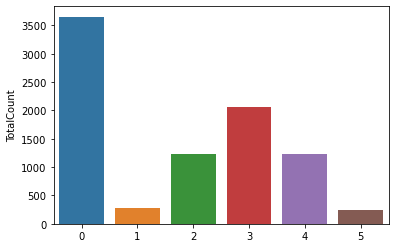

In [41]:
plot = df.TotalCount.value_counts()
sns.barplot(plot.index,plot)

<AxesSubplot:title={'center':'Distribution of TotalCount'}, ylabel='TotalCount'>

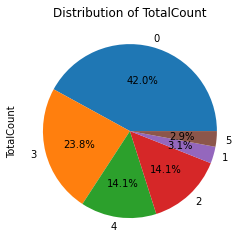

In [42]:
plt.title("Distribution of TotalCount")
df['TotalCount'].value_counts().plot.pie(autopct="%1.1f%%")

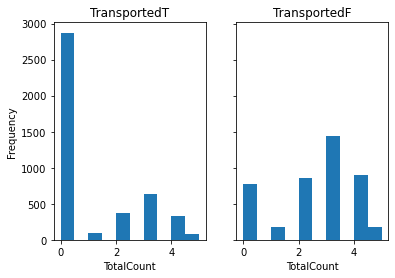

In [43]:
TransportedT = df[df.Transported==True]
TransportedF = df[df.Transported==False]
f,a = plt.subplots(1,2,sharey=True)
a[0].hist(x='TotalCount', data=TransportedT)
a[0].set_title('TransportedT')
a[0].set_xlabel('TotalCount')
a[0].set_ylabel('Frequency')
a[1].hist(x='TotalCount', data=TransportedF)
a[1].set_title('TransportedF')
a[1].set_xlabel('TotalCount')

plt.show()

<AxesSubplot:title={'center':'Distribution of TotalCount of Transported = False'}, ylabel='TotalCount'>

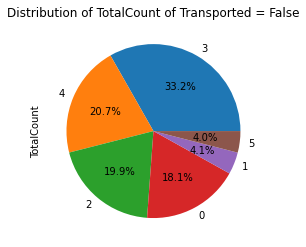

In [44]:
plt.title("Distribution of TotalCount of Transported = False")
TransportedF = df[df.Transported==False]
TransportedF['TotalCount'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'Distribution of TotalCount of Transported = True'}, ylabel='TotalCount'>

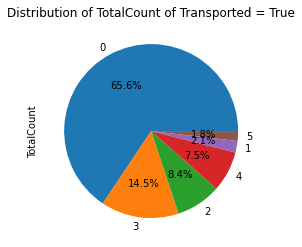

In [45]:
plt.title("Distribution of TotalCount of Transported = True")
TransportedT = df[df.Transported==True]
TransportedT['TotalCount'].value_counts().plot.pie(autopct="%1.1f%%")

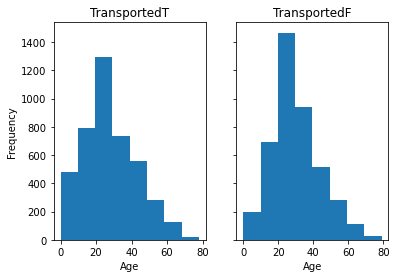

In [46]:
TransportedT = df[df.Transported==True]
TransportedF = df[df.Transported==False]
f,a = plt.subplots(1,2,sharey=True)
a[0].hist(x='Age', bins=8, data=TransportedT)
a[0].set_title('TransportedT')
a[0].set_xlabel('Age')
a[0].set_ylabel('Frequency')
a[1].hist(x='Age', bins=8, data=TransportedF)
a[1].set_title('TransportedF')
a[1].set_xlabel('Age')

plt.show()

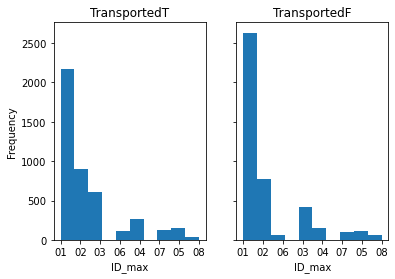

In [47]:
TransportedT = df[df.Transported==True]
TransportedF = df[df.Transported==False]
f,a = plt.subplots(1,2,sharey=True)
a[0].hist(x='ID_max', data=TransportedT)
a[0].set_title('TransportedT')
a[0].set_xlabel('ID_max')
a[0].set_ylabel('Frequency')
a[1].hist(x='ID_max', data=TransportedF)
a[1].set_title('TransportedF')
a[1].set_xlabel('ID_max')

plt.show()

<AxesSubplot:title={'center':'Distribution of ID_max'}, ylabel='ID_max'>

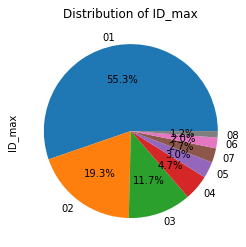

In [48]:
plt.title("Distribution of ID_max")
df['ID_max'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'Distribution of ID_max of Transported = False'}, ylabel='ID_max'>

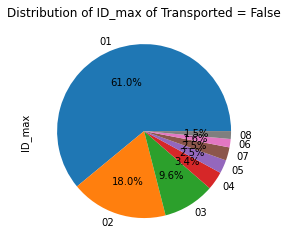

In [49]:
plt.title("Distribution of ID_max of Transported = False")
TransportedF = df[df.Transported==False]
TransportedF['ID_max'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'Distribution of ID_max of Transported = True'}, ylabel='ID_max'>

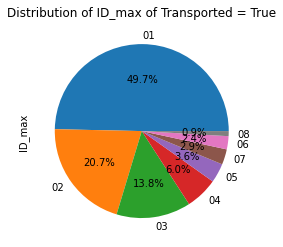

In [50]:
plt.title("Distribution of ID_max of Transported = True")
TransportedF = df[df.Transported==True]
TransportedF['ID_max'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'Distribution of VIP'}, ylabel='VIP'>

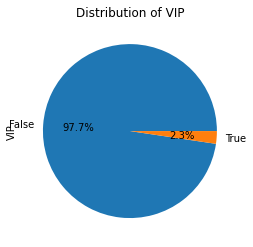

In [51]:
plt.title("Distribution of VIP")
df['VIP'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'Distribution of VIP of Transported = False'}, ylabel='VIP'>

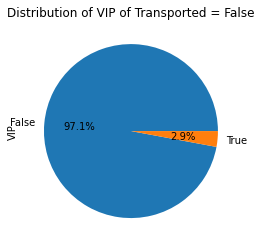

In [52]:
plt.title("Distribution of VIP of Transported = False")
TransportedF = df[df.Transported==False]
TransportedF['VIP'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:title={'center':'Distribution of VIP of Transported = True'}, ylabel='VIP'>

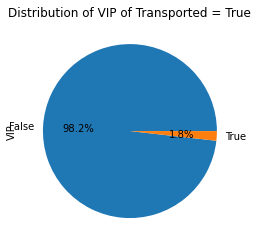

In [53]:
plt.title("Distribution of VIP of Transported = True")
TransportedF = df[df.Transported==True]
TransportedF['VIP'].value_counts().plot.pie(autopct="%1.1f%%")

In [54]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ID,Deck,Num,Side,FirstName,LastName,TotalCount,ID_max,Age_bins,Age_label
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,01,B,0,P,Maham,Ofracculy,0,01,"(30, 40]",4
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,01,F,0,S,Juanna,Vines,5,01,"(20, 30]",3
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,01,A,0,S,Altark,Susent,4,02,"(50, 60]",6
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,02,A,0,S,Solam,Susent,4,02,"(30, 40]",4
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,01,F,1,S,Willy,Santantines,5,01,"(10, 20]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,01,A,98,P,Gravior,Noxnuther,3,01,"(40, 50]",5
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,01,G,1499,S,Kurta,Mondalley,0,01,"(10, 20]",2
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,01,G,1500,S,Fayey,Connon,2,01,"(20, 30]",3
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,01,E,608,S,Celeon,Hontichre,3,02,"(30, 40]",4


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   object  
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
 14  TotalBilled   7785 non-null   float64 
 15  Group         8693 non-null   object  
 16  ID            8693 non-null   object  
 17  Deck          8494 non-null   object  
 18  Num     

In [56]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [57]:
df.HomePlanet.fillna('Z', inplace = True)

In [58]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', 'Z'], dtype=object)

In [59]:
d = {'Europa': 0, 'Earth': 1, 'Mars':2,'Z':99}
df['HomePlanet'] = df['HomePlanet'].map(d)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ID,Deck,Num,Side,FirstName,LastName,TotalCount,ID_max,Age_bins,Age_label
0,0001_01,0,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,01,B,0,P,Maham,Ofracculy,0,01,"(30, 40]",4
1,0002_01,1,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,01,F,0,S,Juanna,Vines,5,01,"(20, 30]",3
2,0003_01,0,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,01,A,0,S,Altark,Susent,4,02,"(50, 60]",6
3,0003_02,0,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,02,A,0,S,Solam,Susent,4,02,"(30, 40]",4
4,0004_01,1,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,01,F,1,S,Willy,Santantines,5,01,"(10, 20]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,01,A,98,P,Gravior,Noxnuther,3,01,"(40, 50]",5
8689,9278_01,1,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,01,G,1499,S,Kurta,Mondalley,0,01,"(10, 20]",2
8690,9279_01,1,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,01,G,1500,S,Fayey,Connon,2,01,"(20, 30]",3
8691,9280_01,0,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,01,E,608,S,Celeon,Hontichre,3,02,"(30, 40]",4


In [60]:
df.HomePlanet.unique()

array([ 0,  1,  2, 99], dtype=int64)

In [61]:
df.CryoSleep.unique()

array([False, True, nan], dtype=object)

In [62]:
df.CryoSleep.fillna('Z', inplace = True)

In [63]:
df.CryoSleep.unique()

array([False, True, 'Z'], dtype=object)

In [64]:
d = {False: 0, True: 1, 'Z':99}
df['CryoSleep'] = df['CryoSleep'].map(d)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ID,Deck,Num,Side,FirstName,LastName,TotalCount,ID_max,Age_bins,Age_label
0,0001_01,0,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,01,B,0,P,Maham,Ofracculy,0,01,"(30, 40]",4
1,0002_01,1,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,01,F,0,S,Juanna,Vines,5,01,"(20, 30]",3
2,0003_01,0,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,01,A,0,S,Altark,Susent,4,02,"(50, 60]",6
3,0003_02,0,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,02,A,0,S,Solam,Susent,4,02,"(30, 40]",4
4,0004_01,1,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,01,F,1,S,Willy,Santantines,5,01,"(10, 20]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,01,A,98,P,Gravior,Noxnuther,3,01,"(40, 50]",5
8689,9278_01,1,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,01,G,1499,S,Kurta,Mondalley,0,01,"(10, 20]",2
8690,9279_01,1,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,01,G,1500,S,Fayey,Connon,2,01,"(20, 30]",3
8691,9280_01,0,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,01,E,608,S,Celeon,Hontichre,3,02,"(30, 40]",4


In [65]:
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [66]:
df.Destination.fillna('Z', inplace = True)

In [67]:
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Z'], dtype=object)

In [68]:
d = {'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e':2,'Z':99}
df['Destination'] = df['Destination'].map(d)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ID,Deck,Num,Side,FirstName,LastName,TotalCount,ID_max,Age_bins,Age_label
0,0001_01,0,0,B/0/P,0,39.0,False,0.0,0.0,0.0,...,01,B,0,P,Maham,Ofracculy,0,01,"(30, 40]",4
1,0002_01,1,0,F/0/S,0,24.0,False,109.0,9.0,25.0,...,01,F,0,S,Juanna,Vines,5,01,"(20, 30]",3
2,0003_01,0,0,A/0/S,0,58.0,True,43.0,3576.0,0.0,...,01,A,0,S,Altark,Susent,4,02,"(50, 60]",6
3,0003_02,0,0,A/0/S,0,33.0,False,0.0,1283.0,371.0,...,02,A,0,S,Solam,Susent,4,02,"(30, 40]",4
4,0004_01,1,0,F/1/S,0,16.0,False,303.0,70.0,151.0,...,01,F,1,S,Willy,Santantines,5,01,"(10, 20]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,0,A/98/P,2,41.0,True,0.0,6819.0,0.0,...,01,A,98,P,Gravior,Noxnuther,3,01,"(40, 50]",5
8689,9278_01,1,1,G/1499/S,1,18.0,False,0.0,0.0,0.0,...,01,G,1499,S,Kurta,Mondalley,0,01,"(10, 20]",2
8690,9279_01,1,0,G/1500/S,0,26.0,False,0.0,0.0,1872.0,...,01,G,1500,S,Fayey,Connon,2,01,"(20, 30]",3
8691,9280_01,0,0,E/608/S,2,32.0,False,0.0,1049.0,0.0,...,01,E,608,S,Celeon,Hontichre,3,02,"(30, 40]",4


In [69]:
df.VIP.unique()

array([False, True, nan], dtype=object)

In [70]:
df.VIP.fillna('Z', inplace = True)

In [71]:
df.VIP.unique()

array([False, True, 'Z'], dtype=object)

In [72]:
d = {False: 0, True: 1, 'Z':99}
df['VIP'] = df['VIP'].map(d)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ID,Deck,Num,Side,FirstName,LastName,TotalCount,ID_max,Age_bins,Age_label
0,0001_01,0,0,B/0/P,0,39.0,0,0.0,0.0,0.0,...,01,B,0,P,Maham,Ofracculy,0,01,"(30, 40]",4
1,0002_01,1,0,F/0/S,0,24.0,0,109.0,9.0,25.0,...,01,F,0,S,Juanna,Vines,5,01,"(20, 30]",3
2,0003_01,0,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,...,01,A,0,S,Altark,Susent,4,02,"(50, 60]",6
3,0003_02,0,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,...,02,A,0,S,Solam,Susent,4,02,"(30, 40]",4
4,0004_01,1,0,F/1/S,0,16.0,0,303.0,70.0,151.0,...,01,F,1,S,Willy,Santantines,5,01,"(10, 20]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,0,A/98/P,2,41.0,1,0.0,6819.0,0.0,...,01,A,98,P,Gravior,Noxnuther,3,01,"(40, 50]",5
8689,9278_01,1,1,G/1499/S,1,18.0,0,0.0,0.0,0.0,...,01,G,1499,S,Kurta,Mondalley,0,01,"(10, 20]",2
8690,9279_01,1,0,G/1500/S,0,26.0,0,0.0,0.0,1872.0,...,01,G,1500,S,Fayey,Connon,2,01,"(20, 30]",3
8691,9280_01,0,0,E/608/S,2,32.0,0,0.0,1049.0,0.0,...,01,E,608,S,Celeon,Hontichre,3,02,"(30, 40]",4


In [73]:
df.Transported.unique()

array([False,  True])

In [74]:
d = {False: 0, True: 1}
df['Transported'] = df['Transported'].map(d)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ID,Deck,Num,Side,FirstName,LastName,TotalCount,ID_max,Age_bins,Age_label
0,0001_01,0,0,B/0/P,0,39.0,0,0.0,0.0,0.0,...,01,B,0,P,Maham,Ofracculy,0,01,"(30, 40]",4
1,0002_01,1,0,F/0/S,0,24.0,0,109.0,9.0,25.0,...,01,F,0,S,Juanna,Vines,5,01,"(20, 30]",3
2,0003_01,0,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,...,01,A,0,S,Altark,Susent,4,02,"(50, 60]",6
3,0003_02,0,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,...,02,A,0,S,Solam,Susent,4,02,"(30, 40]",4
4,0004_01,1,0,F/1/S,0,16.0,0,303.0,70.0,151.0,...,01,F,1,S,Willy,Santantines,5,01,"(10, 20]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,0,A/98/P,2,41.0,1,0.0,6819.0,0.0,...,01,A,98,P,Gravior,Noxnuther,3,01,"(40, 50]",5
8689,9278_01,1,1,G/1499/S,1,18.0,0,0.0,0.0,0.0,...,01,G,1499,S,Kurta,Mondalley,0,01,"(10, 20]",2
8690,9279_01,1,0,G/1500/S,0,26.0,0,0.0,0.0,1872.0,...,01,G,1500,S,Fayey,Connon,2,01,"(20, 30]",3
8691,9280_01,0,0,E/608/S,2,32.0,0,0.0,1049.0,0.0,...,01,E,608,S,Celeon,Hontichre,3,02,"(30, 40]",4


In [75]:
df.Transported.unique()

array([0, 1], dtype=int64)

In [76]:
df.Deck.unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [77]:
df.Deck.fillna('Z', inplace = True)

In [78]:
df.Deck.unique()

array(['B', 'F', 'A', 'G', 'Z', 'E', 'D', 'C', 'T'], dtype=object)

In [79]:
d = {'A': 0, 'B': 1, 'C':2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T':7, 'Z':99}
df['Deck'] = df['Deck'].map(d)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ID,Deck,Num,Side,FirstName,LastName,TotalCount,ID_max,Age_bins,Age_label
0,0001_01,0,0,B/0/P,0,39.0,0,0.0,0.0,0.0,...,01,1,0,P,Maham,Ofracculy,0,01,"(30, 40]",4
1,0002_01,1,0,F/0/S,0,24.0,0,109.0,9.0,25.0,...,01,5,0,S,Juanna,Vines,5,01,"(20, 30]",3
2,0003_01,0,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,...,01,0,0,S,Altark,Susent,4,02,"(50, 60]",6
3,0003_02,0,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,...,02,0,0,S,Solam,Susent,4,02,"(30, 40]",4
4,0004_01,1,0,F/1/S,0,16.0,0,303.0,70.0,151.0,...,01,5,1,S,Willy,Santantines,5,01,"(10, 20]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,0,A/98/P,2,41.0,1,0.0,6819.0,0.0,...,01,0,98,P,Gravior,Noxnuther,3,01,"(40, 50]",5
8689,9278_01,1,1,G/1499/S,1,18.0,0,0.0,0.0,0.0,...,01,6,1499,S,Kurta,Mondalley,0,01,"(10, 20]",2
8690,9279_01,1,0,G/1500/S,0,26.0,0,0.0,0.0,1872.0,...,01,6,1500,S,Fayey,Connon,2,01,"(20, 30]",3
8691,9280_01,0,0,E/608/S,2,32.0,0,0.0,1049.0,0.0,...,01,4,608,S,Celeon,Hontichre,3,02,"(30, 40]",4


In [80]:
df.ID_max.unique()

array(['01', '02', '03', '06', '04', '07', '05', '08'], dtype=object)

In [81]:
d = {'01': 1, '02': 2, '03':3, '04': 4, '05': 5, '06': 6, '07': 7, '08':8}
df['ID_max'] = df['ID_max'].map(d)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ID,Deck,Num,Side,FirstName,LastName,TotalCount,ID_max,Age_bins,Age_label
0,0001_01,0,0,B/0/P,0,39.0,0,0.0,0.0,0.0,...,01,1,0,P,Maham,Ofracculy,0,1,"(30, 40]",4
1,0002_01,1,0,F/0/S,0,24.0,0,109.0,9.0,25.0,...,01,5,0,S,Juanna,Vines,5,1,"(20, 30]",3
2,0003_01,0,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,...,01,0,0,S,Altark,Susent,4,2,"(50, 60]",6
3,0003_02,0,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,...,02,0,0,S,Solam,Susent,4,2,"(30, 40]",4
4,0004_01,1,0,F/1/S,0,16.0,0,303.0,70.0,151.0,...,01,5,1,S,Willy,Santantines,5,1,"(10, 20]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,0,A/98/P,2,41.0,1,0.0,6819.0,0.0,...,01,0,98,P,Gravior,Noxnuther,3,1,"(40, 50]",5
8689,9278_01,1,1,G/1499/S,1,18.0,0,0.0,0.0,0.0,...,01,6,1499,S,Kurta,Mondalley,0,1,"(10, 20]",2
8690,9279_01,1,0,G/1500/S,0,26.0,0,0.0,0.0,1872.0,...,01,6,1500,S,Fayey,Connon,2,1,"(20, 30]",3
8691,9280_01,0,0,E/608/S,2,32.0,0,0.0,1049.0,0.0,...,01,4,608,S,Celeon,Hontichre,3,2,"(30, 40]",4


In [82]:
df.Age_label.unique()

[4, 3, 6, 2, 5, NaN, 1, 7, 8]
Categories (8, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

In [83]:
df['Age_label'] = pandas.factorize(df['Age_label'])[0]

In [84]:
df.Age_label.unique()

array([ 0,  1,  2,  3,  4, -1,  5,  6,  7], dtype=int64)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   int64   
 2   CryoSleep     8693 non-null   int64   
 3   Cabin         8494 non-null   object  
 4   Destination   8693 non-null   int64   
 5   Age           8514 non-null   float64 
 6   VIP           8693 non-null   int64   
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   int64   
 14  TotalBilled   7785 non-null   float64 
 15  Group         8693 non-null   object  
 16  ID            8693 non-null   object  
 17  Deck          8693 non-null   int64   
 18  Num     

In [86]:
df.RoomService.fillna(0, inplace = True)

In [87]:
df.FoodCourt.fillna(0, inplace = True)
df.ShoppingMall.fillna(0, inplace = True)
df.Spa.fillna(0, inplace = True)
df.VRDeck.fillna(0, inplace = True)
df.TotalBilled.fillna(0, inplace = True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   int64   
 2   CryoSleep     8693 non-null   int64   
 3   Cabin         8494 non-null   object  
 4   Destination   8693 non-null   int64   
 5   Age           8514 non-null   float64 
 6   VIP           8693 non-null   int64   
 7   RoomService   8693 non-null   float64 
 8   FoodCourt     8693 non-null   float64 
 9   ShoppingMall  8693 non-null   float64 
 10  Spa           8693 non-null   float64 
 11  VRDeck        8693 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   int64   
 14  TotalBilled   8693 non-null   float64 
 15  Group         8693 non-null   object  
 16  ID            8693 non-null   object  
 17  Deck          8693 non-null   int64   
 18  Num     

In [89]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalBilled', 'TotalCount', 'Deck', 'ID_max', 'Age_label']

X = df[features]
y = df['Transported']

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   VIP           8693 non-null   int64  
 4   RoomService   8693 non-null   float64
 5   FoodCourt     8693 non-null   float64
 6   ShoppingMall  8693 non-null   float64
 7   Spa           8693 non-null   float64
 8   VRDeck        8693 non-null   float64
 9   TotalBilled   8693 non-null   float64
 10  TotalCount    8693 non-null   int64  
 11  Deck          8693 non-null   int64  
 12  ID_max        8693 non-null   int64  
 13  Age_label     8693 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 950.9 KB


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.52093 to fit



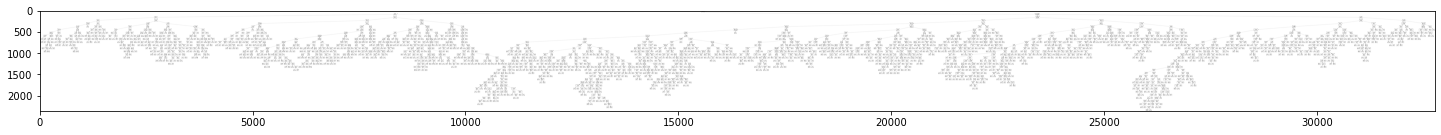

In [91]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('titanicdecisiontree.png')

img=pltimg.imread('titanicdecisiontree.png')
plt.figure(figsize=(25, 25))
imgplot = plt.imshow(img)
plt.show()

In [127]:
dft

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [128]:
dft['TotalBilled'] = dft['RoomService']+dft['FoodCourt']+dft['ShoppingMall']+dft['Spa']+dft['VRDeck']

In [129]:
dft[["Group", "ID"]] = dft["PassengerId"].str.split("_", expand=True)

In [130]:
dft[["Deck", "Num", "Side"]] = dft["Cabin"].str.split("/", expand=True)

In [131]:
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
dft['TotalCount'] = dft[features].gt(0).sum(axis=1)

In [132]:
dft['ID_max'] = dft.groupby(['Group'])['ID'].transform(max)

In [133]:
dft['Age_bins'] = pandas.cut(x=dft['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

In [134]:
dft['Age_label'] = pandas.cut(x=dft['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[1, 2, 3,4,5,6,7,8])

In [135]:
dft.HomePlanet.fillna('Z', inplace = True)

In [136]:
d = {'Europa': 0, 'Earth': 1, 'Mars':2,'Z':99}
dft['HomePlanet'] = dft['HomePlanet'].map(d)

In [137]:
dft.CryoSleep.fillna('Z', inplace = True)

In [138]:
d = {False: 0, True: 1, 'Z':99}
dft['CryoSleep'] = dft['CryoSleep'].map(d)

In [139]:
dft.Destination.fillna('Z', inplace = True)

In [140]:
d = {'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e':2,'Z':99}
dft['Destination'] = dft['Destination'].map(d)

In [141]:
dft.VIP.fillna('Z', inplace = True)

In [142]:
d = {False: 0, True: 1, 'Z':99}
dft['VIP'] = dft['VIP'].map(d)

In [143]:
dft.Deck.fillna('Z', inplace = True)

In [144]:
d = {'A': 0, 'B': 1, 'C':2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T':7, 'Z':99}
dft['Deck'] = dft['Deck'].map(d)

In [145]:
d = {'01': 1, '02': 2, '03':3, '04': 4, '05': 5, '06': 6, '07': 7, '08':8}
dft['ID_max'] = dft['ID_max'].map(d)

In [146]:
dft['Age_label'] = pandas.factorize(dft['Age_label'])[0]

In [147]:
dft.RoomService.fillna(0, inplace = True)
dft.FoodCourt.fillna(0, inplace = True)
dft.ShoppingMall.fillna(0, inplace = True)
dft.Spa.fillna(0, inplace = True)
dft.VRDeck.fillna(0, inplace = True)
dft.TotalBilled.fillna(0, inplace = True)

In [148]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   4277 non-null   object  
 1   HomePlanet    4277 non-null   int64   
 2   CryoSleep     4277 non-null   int64   
 3   Cabin         4177 non-null   object  
 4   Destination   4277 non-null   int64   
 5   Age           4186 non-null   float64 
 6   VIP           4277 non-null   int64   
 7   RoomService   4277 non-null   float64 
 8   FoodCourt     4277 non-null   float64 
 9   ShoppingMall  4277 non-null   float64 
 10  Spa           4277 non-null   float64 
 11  VRDeck        4277 non-null   float64 
 12  Name          4183 non-null   object  
 13  TotalBilled   4277 non-null   float64 
 14  Group         4277 non-null   object  
 15  ID            4277 non-null   object  
 16  Deck          4277 non-null   int64   
 17  Num           4177 non-null   object  
 18  Side    

In [149]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalBilled', 'TotalCount', 'Deck', 'ID_max', 'Age_label']

Xt = dft[features]

In [150]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int64  
 1   CryoSleep     4277 non-null   int64  
 2   Destination   4277 non-null   int64  
 3   VIP           4277 non-null   int64  
 4   RoomService   4277 non-null   float64
 5   FoodCourt     4277 non-null   float64
 6   ShoppingMall  4277 non-null   float64
 7   Spa           4277 non-null   float64
 8   VRDeck        4277 non-null   float64
 9   TotalBilled   4277 non-null   float64
 10  TotalCount    4277 non-null   int64  
 11  Deck          4277 non-null   int64  
 12  ID_max        4277 non-null   int64  
 13  Age_label     4277 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 467.9 KB


In [152]:
dft['Transported'] = dtree.predict(Xt)

In [153]:
dft

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,ID,Deck,Num,Side,TotalCount,ID_max,Age_bins,Age_label,predict,Transported
0,0013_01,1,1,G/3/S,0,27.0,0,0.0,0.0,0.0,...,01,6,3,S,0,1,"(20.0, 30.0]",0,1,1
1,0018_01,1,0,F/4/S,0,19.0,0,0.0,9.0,0.0,...,01,5,4,S,2,1,"(10.0, 20.0]",1,0,0
2,0019_01,0,1,C/0/S,2,31.0,0,0.0,0.0,0.0,...,01,2,0,S,0,1,"(30.0, 40.0]",2,1,1
3,0021_01,0,0,C/1/S,0,38.0,0,0.0,6652.0,0.0,...,01,2,1,S,3,1,"(30.0, 40.0]",2,1,1
4,0023_01,1,0,F/5/S,0,20.0,0,10.0,0.0,635.0,...,01,5,5,S,2,1,"(10.0, 20.0]",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,0,34.0,0,0.0,0.0,0.0,...,02,6,1496,S,0,2,"(30.0, 40.0]",2,1,1
4273,9269_01,1,0,NaN,0,42.0,0,0.0,847.0,17.0,...,01,99,NaN,NaN,4,1,"(40.0, 50.0]",3,0,0
4274,9271_01,2,1,D/296/P,2,NaN,0,0.0,0.0,0.0,...,01,3,296,P,0,1,NaN,-1,1,1
4275,9273_01,0,0,D/297/P,99,NaN,0,0.0,2680.0,0.0,...,01,3,297,P,2,1,NaN,-1,1,1


In [154]:
d = {0: False, 1: True}
dft['Transported'] = dft['Transported'].map(d)

In [156]:
output = pandas.DataFrame({'PassengerId': dft.PassengerId,
                       'Transported': dft.Transported})
output.to_csv('submission.csv', index=False)